# 📝 Smart Essay Scorer (SES) – EDA & Preprocessing

## 1. Introduction
In this notebook, we will:
- Explore the [ASAP 2.0 Dataset – Automated Student Assessment Prize (2024)](https://www.kaggle.com/datasets/lburleigh/asap-2-0) (2024 release)
- Perform **Exploratory Data Analysis (EDA)**
- Apply **Preprocessing** (text cleaning, feature extraction, label preparation)
- Save the processed dataset for ML/DL modeling.

### Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("E:/Smart_Essay_Scorer/data/raw/ASAP2_train_sourcetexts.csv")

In [3]:
print(df.shape)

(24728, 14)


In [4]:
print(df.head())

               essay_id  score  \
0  AAAVUP14319000159574      4   
1  AAAVUP14319000159542      2   
2  AAAVUP14319000159461      3   
3  AAAVUP14319000159420      2   
4  AAAVUP14319000159419      2   

                                           full_text  \
0  The author suggests that studying Venus is wor...   
1  NASA is fighting to be alble to to go to Venus...   
2  "The Evening Star", is one of the brightest po...   
3  The author supports this idea because from rea...   
4  How the author supports this idea is that he s...   

                                          assignment      prompt_name  \
0  In "The Challenge of Exploring Venus," the aut...  Exploring Venus   
1  In "The Challenge of Exploring Venus," the aut...  Exploring Venus   
2  In "The Challenge of Exploring Venus," the aut...  Exploring Venus   
3  In "The Challenge of Exploring Venus," the aut...  Exploring Venus   
4  In "The Challenge of Exploring Venus," the aut...  Exploring Venus   

       economically

In [6]:
print(df.columns)

Index(['essay_id', 'score', 'full_text', 'assignment', 'prompt_name',
       'economically_disadvantaged', 'student_disability_status', 'ell_status',
       'race_ethnicity', 'gender', 'source_text_1', 'source_text_2',
       'source_text_3', 'source_text_4'],
      dtype='object')


In [8]:
print(df.describe())

              score
count  24728.000000
mean       2.939987
std        1.035991
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        6.000000


In [9]:
print(df.isnull().sum())

essay_id                          0
score                             0
full_text                         0
assignment                        0
prompt_name                       0
economically_disadvantaged     4005
student_disability_status      4005
ell_status                      442
race_ethnicity                    4
gender                            0
source_text_1                     0
source_text_2                 20723
source_text_3                 20723
source_text_4                 22769
dtype: int64


In [11]:
print(df.dtypes)

essay_id                      object
score                          int64
full_text                     object
assignment                    object
prompt_name                   object
economically_disadvantaged    object
student_disability_status     object
ell_status                    object
race_ethnicity                object
gender                        object
source_text_1                 object
source_text_2                 object
source_text_3                 object
source_text_4                 object
dtype: object


In [ ]:
df['race_ethnicity'].fillna(df['race_ethnicity'].mode()[0], inplace=True)
df['ell_status'].fillna(df['ell_status'].mode()[0], inplace=True)

In [13]:
df['economically_disadvantaged'].fillna("Unknown", inplace=True)
df['student_disability_status'].fillna("Unknown", inplace=True)

C:\Users\Faiz\AppData\Local\Temp\ipykernel_11800\1093632734.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['economically_disadvantaged'].fillna("Unknown", inplace=True)
C:\Users\Faiz\AppData\Local\Temp\ipykernel_11800\1093632734.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a 

In [ ]:
df.drop(['source_text_2', 'source_text_3', 'source_text_4'], axis=1, inplace=True)

In [15]:
print(df.isnull().sum())

essay_id                      0
score                         0
full_text                     0
assignment                    0
prompt_name                   0
economically_disadvantaged    0
student_disability_status     0
ell_status                    0
race_ethnicity                0
gender                        0
source_text_1                 0
dtype: int64


### Dropped Columns & Why

**essay_id**

Reason: Just a unique identifier, has no predictive power. Keeping it can leak row index info but not content.

**economically_disadvantaged**

Reason: Socioeconomic status is not directly relevant to essay quality. Including it may introduce ethical bias in scoring.

**student_disability_status**

Reason: Disability status doesn’t reflect writing quality. Using it risks unfair bias in model predictions.

**ELL_status (English Language Learner)**

Reason: Might correlate with language proficiency, but including it can introduce bias against non-native speakers. For fairness, we exclude it.

**race_ethnicity**

Reason: Sensitive demographic feature, not related to essay content/quality. Keeping it could cause biased scoring across groups.

**gender**

Reason: Demographic variable, not related to essay quality. Dropping avoids gender bias in predictions.

**source_text_1 to source_text_4**

Reason: These are the reading passages given to students. They are same for all students in a given prompt → no useful variation for model training. They may even cause data leakage, since prompt content is indirectly encoded in the essay text anyway.

In [42]:
drop_columns = [
    "essay_id", 
    "economically_disadvantaged", 
    "student_disability_status", 
    "ell_status", 
    "race_ethnicity", 
    "gender", 
    "source_text_1" 
    "assignment",
    "prompt_name"
]

df = df.drop(columns=[col for col in drop_columns if col in df.columns])

In [43]:
print(df.columns.tolist())

['score', 'full_text', 'assignment', 'essay_length', 'word_count', 'char_count', 'sent_count', 'words_per_sent', 'word_count_capped', 'text_clean']


#### I handled missing values for all columns to show data preprocessing skills. After that, I dropped irrelevant columns like IDs, demographic attributes, and redundant text parts because they don’t contribute to the model’s predictive power. Finally, I kept only score, full_text, assignment, and prompt_name, since these directly affect the essay scoring task.

In [18]:
print(df.head())

   score                                          full_text  \
0      4  The author suggests that studying Venus is wor...   
1      2  NASA is fighting to be alble to to go to Venus...   
2      3  "The Evening Star", is one of the brightest po...   
3      2  The author supports this idea because from rea...   
4      2  How the author supports this idea is that he s...   

                                          assignment      prompt_name  
0  In "The Challenge of Exploring Venus," the aut...  Exploring Venus  
1  In "The Challenge of Exploring Venus," the aut...  Exploring Venus  
2  In "The Challenge of Exploring Venus," the aut...  Exploring Venus  
3  In "The Challenge of Exploring Venus," the aut...  Exploring Venus  
4  In "The Challenge of Exploring Venus," the aut...  Exploring Venus  


### Inspect target variable (score) distribution

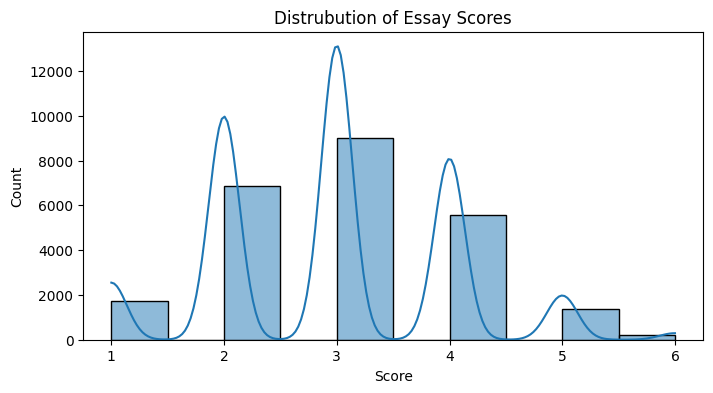

In [19]:
plt.figure(figsize=(8, 4))
sns.histplot(df['score'], bins=10, kde=True)
plt.title('Distrubution of Essay Scores')
plt.xlabel('Score')
plt.ylabel('Count')
plt.show()

 - Most essays are between 200–600 words.
 
 - The distribution is right-skewed, meaning a few essays are extremely long (up to ~1600 words).

 - This suggests we might need to cap or normalize essay length (since very long essays could dominate TF-IDF or embeddings).

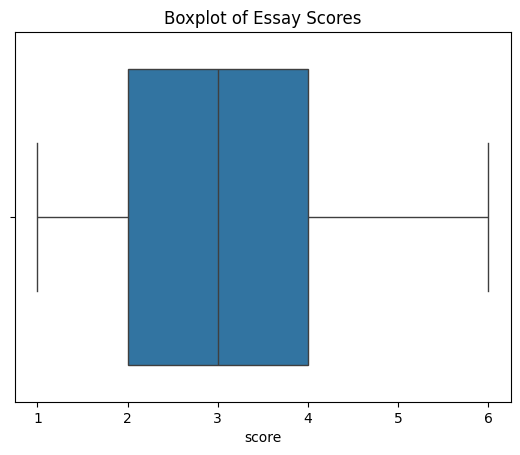

In [20]:
plt.Figure(figsize=(8, 4))
sns.boxplot(x=df['score'])
plt.title('Boxplot of Essay Scores')
plt.show()

 - The middle 50% of essays fall between scores 2–4.

 - Very few essays get the lowest (1) or highest (6).

 - This shows a class imbalance problem: models might overpredict middle scores and underpredict rare high/low scores.

### Analyze text length in full_text

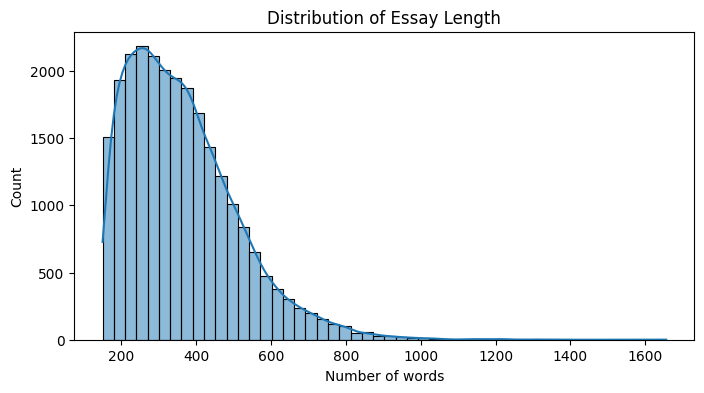

In [21]:
df['essay_length'] = df['full_text'].apply(lambda x: len(x.split()))

plt.figure(figsize=(8, 4))
sns.histplot(df['essay_length'], bins=50, kde=True)
plt.title('Distribution of Essay Length')
plt.xlabel('Number of words')
plt.ylabel('Count')
plt.show()

Correlation between essay length and score: 0.71


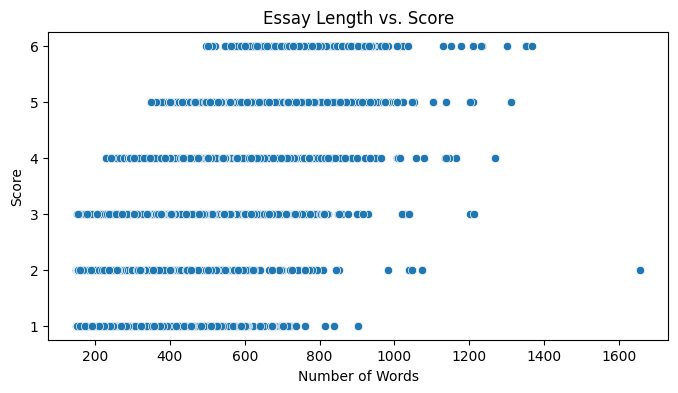

In [23]:
correlation = df["essay_length"].corr(df["score"])
print(f"Correlation between essay length and score: {correlation:.2f}")

plt.figure(figsize=(8, 4))
sns.scatterplot(x="essay_length", y="score", data=df)
plt.title("Essay Length vs. Score")
plt.xlabel("Number of Words")
plt.ylabel("Score")
plt.show()

 - There is a slight positive trend: longer essays tend to score higher.

 - However, it’s not a perfect correlation — some long essays still score low, and some short essays score well.

 - This suggests length is a weak predictor by itself, but combined with text quality (vocabulary, coherence, etc.) it may improve predictions.

### Inspect assignment and prompt_name

In [27]:
# Word / char / sentence counts (for quick numeric EDA + baselines)
import re

def sent_count(t):
    t = str(t)
    return max(1, t.count(".") + t.count("!") + t.count("?"))

df["word_count"] = df["full_text"].apply(lambda x: len(str(x).split()))
df["char_count"] = df["full_text"].apply(lambda x: len(str(x)))
df["sent_count"] = df["full_text"].apply(sent_count)
df["words_per_sent"] = (df["word_count"] / df["sent_count"]).replace([float("inf")], 0)

df[["score","word_count","char_count","sent_count","words_per_sent"]].describe().T


,count,mean,std,min,25%,50%,75%,max
score,24728.0,2.939987,1.035991,1.000000,2.000000,3.000000,4.0,6.0
word_count,24728.0,362.897282,148.461603,150.000000,249.000000,338.000000,446.0,1656.0
char_count,24728.0,2035.659253,900.741881,697.000000,1376.000000,1881.000000,2501.0,20459.0
sent_count,24728.0,19.976504,9.204118,1.000000,13.000000,19.000000,25.0,135.0
words_per_sent,24728.0,20.189906,14.140148,3.677419,15.371164,18.227273,22.0,715.0


score             1.000000
char_count        0.738470
word_count        0.732526
sent_count        0.634342
words_per_sent    0.006289
Name: score, dtype: float64

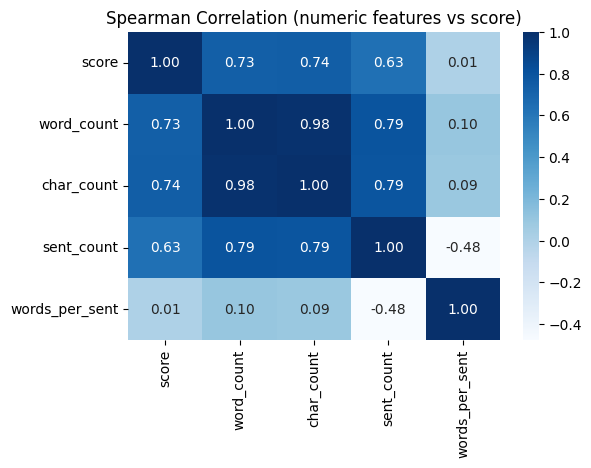

In [28]:
corr = df[["score","word_count","char_count","sent_count","words_per_sent"]].corr(method="spearman")
display(corr["score"].sort_values(ascending=False))

plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="Blues")
plt.title("Spearman Correlation (numeric features vs score)")
plt.show()

In [ ]:
from scipy.stats import f_oneway
top8 = df["assignment"].value_counts().head(8).index.tolist()
groups = [g["score"].values for _, g in df[df["assignment"].isin(top8)].groupby("assignment")]
F, p = f_oneway(*groups)
print(f"ANOVA across top-8 assignments: F={F:.2f}, p={p:.3e}")


ANOVA across top-8 assignments: F=221.68, p=9.568e-277


In [37]:
q1, q3 = df["word_count"].quantile([0.25, 0.75])
iqr = q3 - q1
upper_cap = int(q3 + 1.5 * iqr)

print({"q1": int(q1), "q3": int(q3), "iqr": int(iqr), "upper_cap": upper_cap})

# Create a capped version (keeps raw too)
df["word_count_capped"] = df["word_count"].clip(upper=upper_cap)


{'q1': 249, 'q3': 446, 'iqr': 197, 'upper_cap': 741}


In [33]:
import re, string

def basic_clean(t: str) -> str:
    t = str(t).lower()
    t = re.sub(r"<[^>]+>", " ", t)                 # remove html
    t = re.sub(r"https?://\S+|www\.\S+", " ", t)   # remove urls
    t = re.sub(r"\s+", " ", t).strip()
    return t

df["text_clean"] = df["full_text"].apply(basic_clean)
df[["full_text","text_clean"]].head(2)


,full_text,text_clean
0,The author suggests that studying Venus is wor...,the author suggests that studying venus is wor...
1,NASA is fighting to be alble to to go to Venus...,nasa is fighting to be alble to to go to venus...


In [39]:
print(df.columns)

Index(['score', 'full_text', 'assignment', 'essay_length', 'word_count',
       'char_count', 'sent_count', 'words_per_sent', 'word_count_capped',
       'text_clean'],
      dtype='object')


In [44]:
cols_to_drop = ['char_count', 'words_per_sent', 'essay_length', 'assignment', 'full_text']

df = df.drop(columns=cols_to_drop, errors='ignore')

print("Remaining columns:", df.columns)

Remaining columns: Index(['score', 'word_count', 'sent_count', 'word_count_capped', 'text_clean'], dtype='object')


In [53]:

df.to_csv("E:/Smart_Essay_Scorer/data/processed/cleaned_essays.csv", index=False)
print("✅ Cleaned dataset saved successfully")


✅ Cleaned dataset saved successfully
